# Kidney Stone Segmentation Using U-Net and Fully Convolutional Networks

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.python.keras.backend import set_session
import os
import random
import numpy as np

from keras_unet_collection import models
from tqdm import tqdm 

from PIL import Image
import cv2
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

2024-11-06 14:52:50.104714: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-06 14:52:50.822082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Parameters and Variable

In [2]:
#seeds = [13, 42, 1, 83, 76]
seeds = [13, 42]
np.random.seed = [0]

num_classes = 1
split_size = 0.2


IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 1

DATA_PATH = 'data/'

data_ids = next(os.walk(DATA_PATH+'/image'))[2]

X = np.zeros((len(data_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y = np.zeros((len(data_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR']= 'cuda_malloc_async'


## Read Dataset

In [3]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(data_ids), total=len(data_ids)):   
    path = DATA_PATH
    img = imread(path + '/image/' + id_)[:,:]
    img = img.reshape(img.shape[0], img.shape[1], IMG_CHANNELS)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X[n] = img  #Fill empty X_train with values from img
    
    mask = imread(path + 'label/' + id_)
    mask = (mask >= 250)
    mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
    y[n] = mask 
    #plt.axis("off")
    #imshow(y[n])
    #plt.show()

Resizing training images and masks


100%|█████████████████████████████████████████████████████████████████████████████████| 838/838 [00:17<00:00, 46.66it/s]


2024-11-06 14:53:10.519381: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-06 14:53:10.547034: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-06 14:53:10.547074: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-06 14:53:10.549055: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-06 14:53:10.549093: I external/local_xla/xla/stream_executor

----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	xnet_output_sup0_activation
	xnet_output_sup1_activation
	xnet_output_sup2_activation
	xnet_output_final_activation
Epoch 1/300


/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/optimizers/base_optimizer.py:576: UserWarning: Gradients do not exist for variables ['kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
I0000 00:00:1730915593.974070    9764 service.cc:145] XLA service 0x7f131c005bf0 initialized for platform CUDA (this does not guarante

 9/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.9501 - xnet_output_sup0_activation_accuracy: 0.8321 - xnet_output_sup0_activation_recall: 0.2757

I0000 00:00:1730915599.480450    9764 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.5376 - xnet_output_sup0_activation_accuracy: 0.9549 - xnet_output_sup0_activation_recall: 0.0515 - val_loss: 0.3239 - val_xnet_output_sup0_activation_accuracy: 0.9985 - val_xnet_output_sup0_activation_recall: 0.0000e+00
Epoch 2/300
13/84 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3191 - xnet_output_sup0_activation_accuracy: 0.9987 - xnet_output_sup0_activation_recall: 0.0000e+00

/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_recall available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2776 - xnet_output_sup0_activation_accuracy: 0.9988 - xnet_output_sup0_activation_recall: 0.0000e+00 - val_loss: 0.1341 - val_xnet_output_sup0_activation_accuracy: 0.9992 - val_xnet_output_sup0_activation_recall: 0.0000e+00
Epoch 3/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1003 - xnet_output_sup0_activation_accuracy: 0.9993 - xnet_output_sup0_activation_recall: 1.1876e-05 - val_loss: 0.0413 - val_xnet_output_sup0_activation_accuracy: 0.9993 - val_xnet_output_sup0_activation_recall: 0.0000e+00
Epoch 4/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0336 - xnet_output_sup0_activation_accuracy: 0.9994 - xnet_output_sup0_activation_recall: 4.4625e-05 - val_loss: 0.0213 - val_xnet_output_sup0_activation_accuracy: 0.9993 - val_xnet_output_sup0_activation_recall: 0.0000e+00
Epoch 5/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0189 - xnet_output_sup0_activation_accuracy: 0.9994 - xnet_output_sup0_activation_recall: 1.

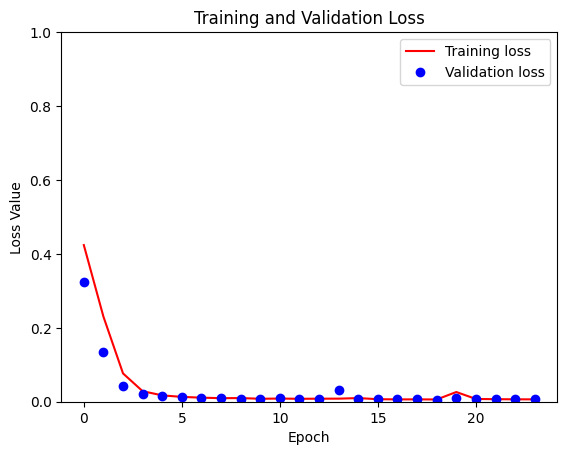

/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/skl

Accuracy: 0.9993168058849516 +- 0.0007246771744735227
Jaccard: 0.0 +- 0.0
Dice: 0.0 +- 0.0
F1 Score: 0.0 +- 0.0
Precision: 0.0 +- 0.0
Recall: 0.0 +- 0.0


In [4]:

acc = []
jacc = []
f1 = []
prec = []
rec = []


for f in range(1, len(seeds)):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_size, random_state=seeds[f])
    
    model = models.unet_plus_2d((512, 512, 1), [16, 32, 64, 128], n_labels=1,
                            stack_num_down=2, stack_num_up=2,
                            activation='LeakyReLU', output_activation='Sigmoid',
                            batch_norm=False, pool='max', unpool=False, deep_supervision=True, name='xnet')

    # Define metrics for each output
    metrics = ['accuracy', tf.keras.metrics.Recall(name='recall')]
    metrics_dict = {output_name: metrics for output_name in model.output_names}

    model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Use a single loss function for the final output
    metrics= metrics_dict
     )
    
    checkpoint_filepath = 'Unet++test' + str(f)+'fold.keras'
    callbacks = [
            tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
            tf.keras.callbacks.TensorBoard(log_dir='logs'),
            tf.keras.callbacks.ModelCheckpoint(
                filepath=checkpoint_filepath,
                save_weights_only=False,
                monitor='val_recall',
                mode='max',
                save_best_only=True,
                verbose=1)]
    
    model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=8, epochs=300, callbacks=callbacks)
    model.save('Unet++Modelo1.keras')

    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']

    plt.figure()
    plt.plot( loss, 'r', label='Training loss')
    plt.plot( val_loss, 'bo', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.ylim([0, 1])
    plt.legend()
    plt.show()


    for i in range(0, len(X_val)):
        sample_image = X_val[i]
        sample_mask = y_val[i].astype(np.uint8).flatten()
        prediction = model.predict(sample_image[tf.newaxis, ...],verbose=0)[0]
        predicted_mask = (prediction > 0.5).astype(np.uint8).flatten()
            
        acc.append(accuracy_score(sample_mask, predicted_mask))
        jacc.append(jaccard_score(sample_mask, predicted_mask))
        f1.append(f1_score(sample_mask, predicted_mask))
        prec.append(precision_score(sample_mask, predicted_mask))
        rec.append(recall_score(sample_mask, predicted_mask))

    #del model
    tf.keras.backend.clear_session()

    f+=1
    
    jacc = np.array(jacc)

    print(f"Accuracy: {np.mean(acc)} +- {np.std(acc)}")
    print(f"Jaccard: {np.mean(jacc)} +- {np.std(jacc)}")
    print(f"Dice: {(2*np.mean(jacc))/(1+np.mean(jacc))} +- {np.std(2*jacc/(1+jacc))}")
    print(f"F1 Score: {np.mean(f1)} +- {np.std(f1)}")
    print(f"Precision: {np.mean(prec)} +- {np.std(prec)}")
    print(f"Recall: {np.mean(rec)} +- {np.std(rec)}")

In [5]:
jacc = np.array(jacc)

print(f"Accuracy: {np.mean(acc)} +- {np.std(acc)}")
print(f"Jaccard: {np.mean(jacc)} +- {np.std(jacc)}")
print(f"Dice: {(2*np.mean(jacc))/(1+np.mean(jacc))} +- {np.std(2*jacc/(1+jacc))}")
print(f"F1 Score: {np.mean(f1)} +- {np.std(f1)}")
print(f"Precision: {np.mean(prec)} +- {np.std(prec)}")
print(f"Recall: {np.mean(rec)} +- {np.std(rec)}")

Accuracy: 0.9993168058849516 +- 0.0007246771744735227
Jaccard: 0.0 +- 0.0
Dice: 0.0 +- 0.0
F1 Score: 0.0 +- 0.0
Precision: 0.0 +- 0.0
Recall: 0.0 +- 0.0


In [6]:
import tensorflow as tf
best_model = tf.keras.models.load_model('Unet++modelo1.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


ValueError: Expected image array to have rank 3 (single image). Got array with shape: (0, 512, 512, 1)

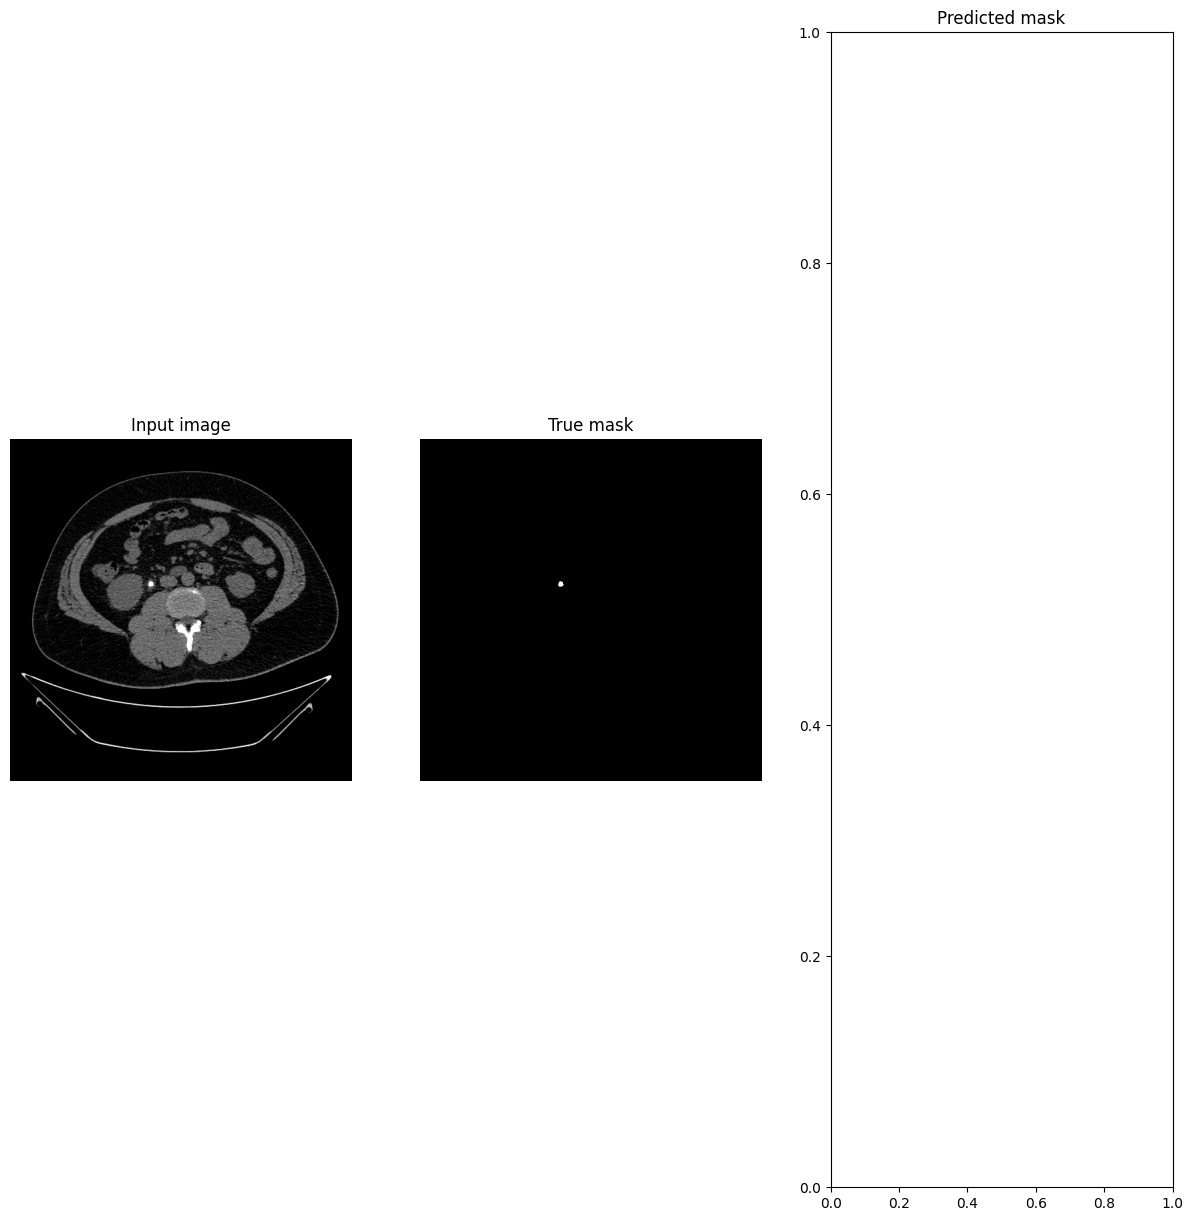

In [11]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input image', 'True mask', 'Predicted mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    image = display_list[i]
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]), cmap='gray')
    plt.axis('off')
  plt.show()
   
i = random.randint(0, len(X_val) - 1)
sample_image = X_val[i]
sample_mask = y_val[i]
prediction = best_model.predict(sample_image[tf.newaxis, ...])[0]
predicted_mask = (prediction > 0.5).astype(np.uint8)
predicted_mask = predicted_mask[1:]
display([sample_image, sample_mask,predicted_mask])
sample_mask = y_val[i].astype(np.uint8).flatten()

predicted_mask = predicted_mask.flatten()


print("Accuracy: "+ str(accuracy_score(sample_mask, predicted_mask)))
print("Jaccard: "+ str(jaccard_score(sample_mask, predicted_mask)))
print("Dice: "+ str((2*jaccard_score(sample_mask, predicted_mask))/(1+jaccard_score(sample_mask, predicted_mask))))
print("Precision: "+ str(precision_score(sample_mask, predicted_mask)))
print("Recall: "+ str(recall_score(sample_mask, predicted_mask)))

In [12]:
predicted_mask.shape

(0, 512, 512, 1)

Acuraccy:  0.9998064804077148
Jaccard:  0.7504550150031974
F1 Score:  0.8574399325558522
Precision:  0.9923892538866844
Recall:  0.7547991292301603

In [9]:
sample_image.shape

(512, 512, 1)

In [10]:
sample_mask.shape

(262144,)